# Bitcoin, it is better to follow the RSI or buy and hold (HODL)

It is easy to find multiple sites on the web where they recommend using the RSI (Relative Strength Index) indicator to perform a technical analysis of the price of an asset.

So we are going to examine how one of the most used strategies with this indicator in the last three years has behaved in the case of bitcoin.

The Relative Strength Index (RSI) is a technical indicator that measures the speed and change of price movements, it was developed by J. Welles Wilder.

The RSI moves from 0 to 100 and the most common strategy is to open a long position (buy stocks) if the RSI indicator rises above the 30 level from below because at that time the stocks are considered oversold and if the RSI of the stock crosses the 70 level from above a short position must be entered (selling shares) because the stock is considered to be overbought.

The calculation process to calculate this metric is as follows:

*   The closing price for the last 14 days is tracked.
*   It is determined whether the closing price of the current day is higher or lower than that of the previous day.
*   The average profit or loss for the last 14 days is calculated.
*   The relative strength is calculated, RS = AvgGain / AvgLoss
*   The relative strength index is calculated, RSI = 100 – 100 / (1 + RS)
We are going to carry out a Python program where we will perform a backtest to see if it would have been worth acting as indicated by the RSI.






In [18]:
# The necessary library is install to download the BTC price data from the Yahoo Finance website.
!pip install yfinance > /dev/null

We import the necessary libraries.

In [19]:
import pandas as pd 
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
from math import floor
from termcolor import colored as cl

Obtain the data of the price of bitcoin in the last 3 years.


In [20]:
start = datetime(2019,1,1)
end = datetime(2021,12,31)
df = yf.download('BTC-USD', start=start, interval = '1d')[['Close']]

[*********************100%***********************]  1 of 1 completed


Calculate the RSI using the exponential moving average in a period of 14 days.

In [21]:
periods = 14
df['close_delta'] = df['Close'].diff()
df['gain'] = df['close_delta'].clip(lower=0)
df['loss'] = -1 * df['close_delta'].clip(upper=0)

df['ema_up'] = df['gain'].ewm(com=periods -1, adjust=True).mean()
df['ema_down'] = df['loss'].ewm(com=periods -1, adjust=True).mean()
df['rs'] = df['ema_up']/df['ema_down']
df['rsi'] = 100-(100/(1+df['rs']))

Show the results.

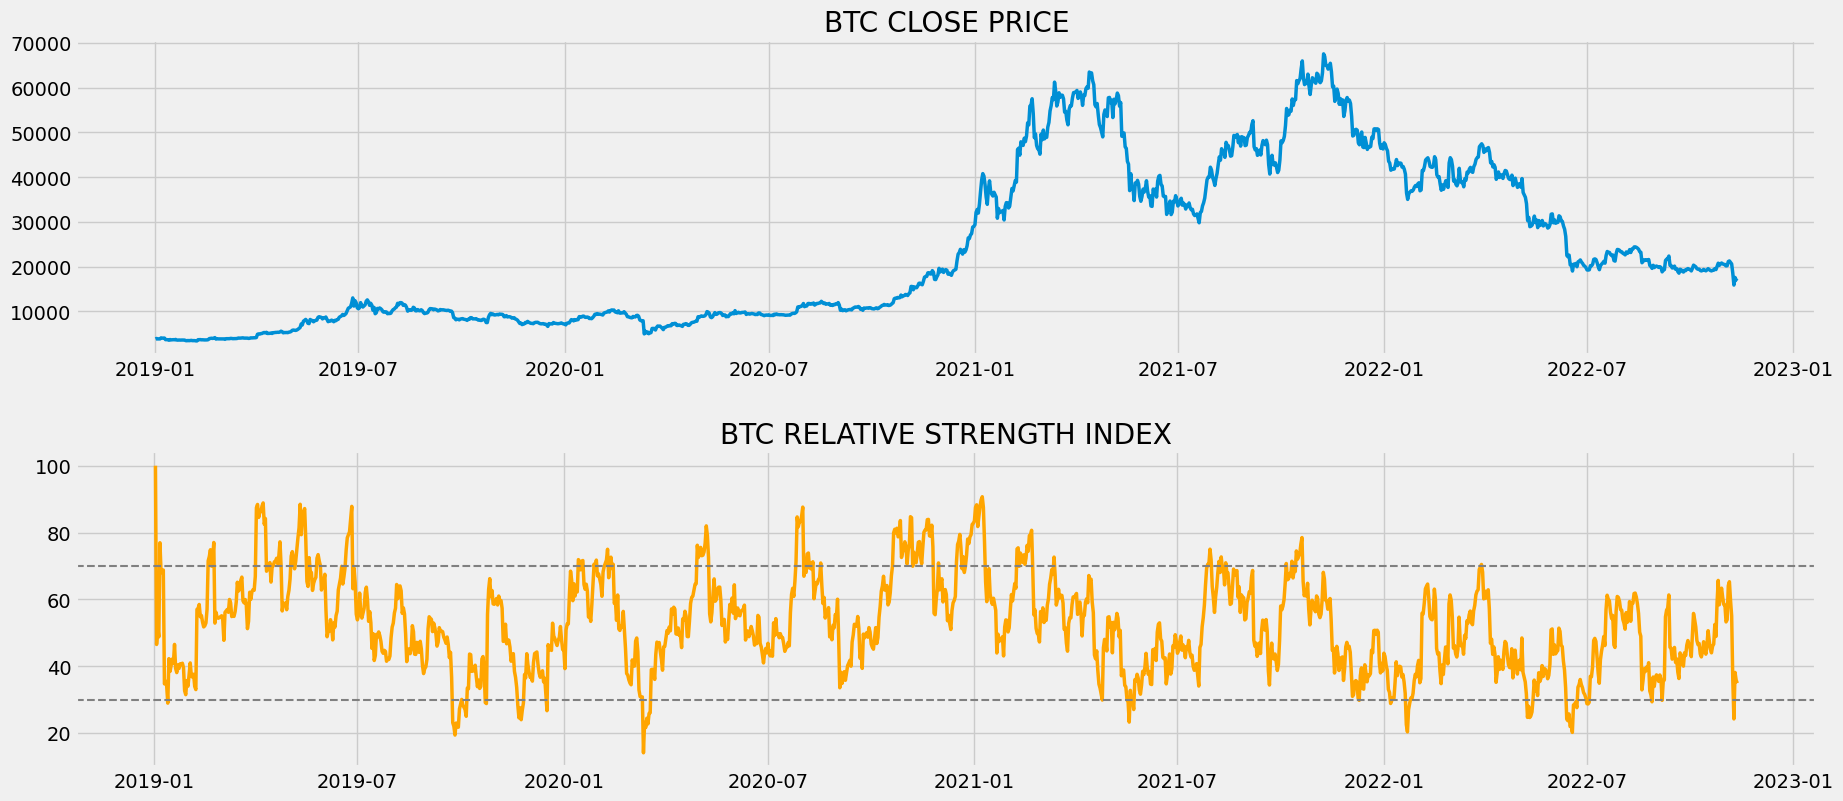

In [22]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(df['Close'], linewidth = 2.5)
ax1.set_title('BTC CLOSE PRICE')
ax2.plot(df['rsi'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('BTC RELATIVE STRENGTH INDEX')
plt.show()

Implement the strategy 30 70.

In [23]:
df['return'] = df['Close']/df['Close'].shift(1)
df['signal'] = np.where((df['rsi'] < 30),1,np.nan)
df['signal'] = np.where((df['rsi'] > 70),0,df['signal'])
df['signal'].ffill(inplace=True)
df['strategy'] = df['return'] ** df['signal'].shift(1)

Graph showing the trajectory of the strategy followed.

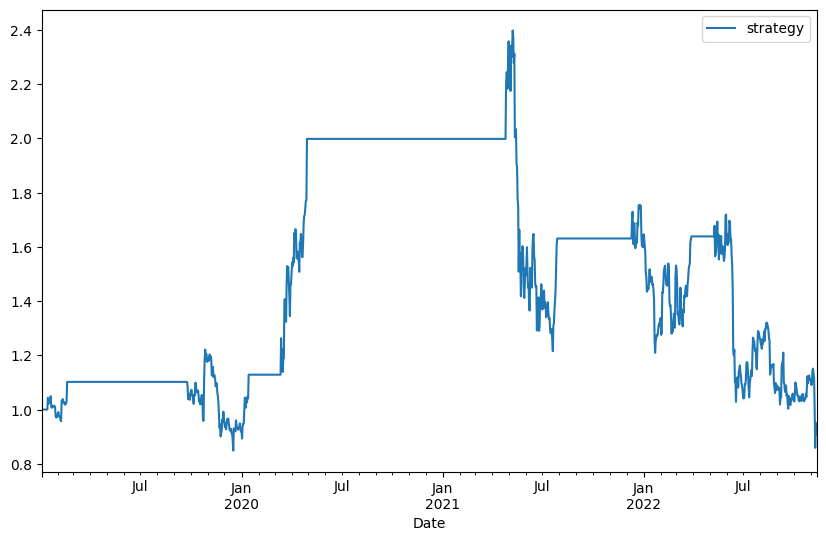

In [24]:
plt.rcParams.update(plt.rcParamsDefault)
df[['strategy']].dropna().cumprod().plot(figsize=(10,6))

As can be seen in the graph, if we had had a profit of 60% (not counting commissions), which means that if on January 1, 2019 we had bought 1000 dollars in bitcoin on December 31, 2021 we would have $ 1600 which it is very good and there has been a large period with a profit of 200% and even a peak with a 240%.

Now we are going to buy that profit with the evolution of the price of bitcoin.

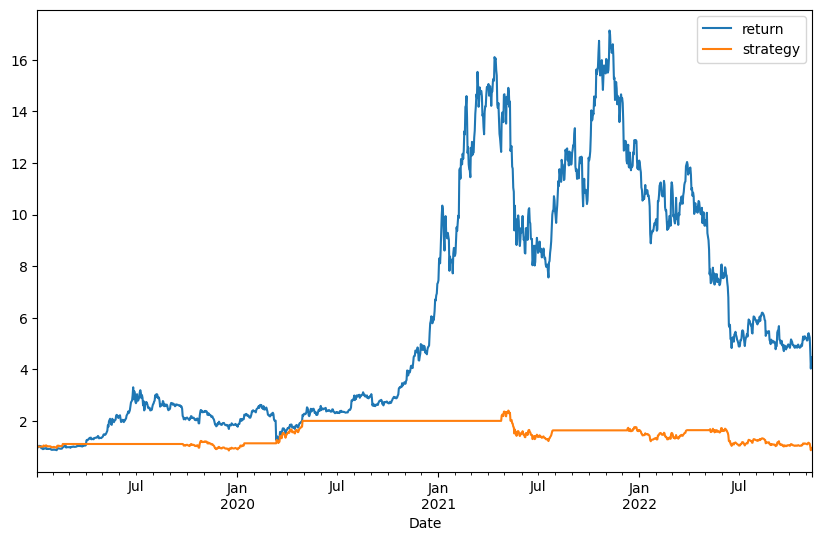

In [25]:
df[['return','strategy']].dropna().cumprod().plot(figsize=(10,6))

In this graph it can be seen that the price evolution has really been much better than the strategy followed with the RSI indicator, the price has revalued by 1200% since January 1, 2019 and December 31, 2021, much higher than 60% that we would have achieved with the RSI. If we had bought 1,000 at the beginning of 2019, we would have 12,000 dollars at the end of 2021.
Not counting the first 4 months of 2019 where the price performance is similar to that of the strategy followed with the RSI, the rest of the time the profit is much higher if we had bought and held the BTC.